<a href="https://colab.research.google.com/github/jmend01/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/module1-afirstlookatdata/Jonathan_Mendoza_LS_DS_111_A_First_Look_at_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - A First Look at Data



## Lecture - let's explore Python DS libraries and examples!

The Python Data Science ecosystem is huge. You've seen some of the big pieces - pandas, scikit-learn, matplotlib. What parts do you want to see more of?

In [0]:
import pandas as pd
drinks = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv')
print(drinks.shape)
drinks.head()

(193, 5)


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [0]:
drinks.columns

Index(['country', 'beer_servings', 'spirit_servings', 'wine_servings',
       'total_litres_of_pure_alcohol'],
      dtype='object')

In [0]:
drinks.sort_values('beer_servings', ascending = False).head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
117,Namibia,376,3,1,6.8
45,Czech Republic,361,170,134,11.8
62,Gabon,347,98,59,8.9
65,Germany,346,117,175,11.3
98,Lithuania,343,244,56,12.9
135,Poland,343,215,56,10.9
188,Venezuela,333,100,3,7.7
81,Ireland,313,118,165,11.4
129,Palau,306,63,23,6.9
140,Romania,297,122,167,10.4


In [0]:
drinks['drinks_alcohol'] = (drinks.total_litres_of_pure_alcohol > 0)
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_alcohol
0,Afghanistan,0,0,0,0.0,False
1,Albania,89,132,54,4.9,True
2,Algeria,25,0,14,0.7,True
3,Andorra,245,138,312,12.4,True
4,Angola,217,57,45,5.9,True


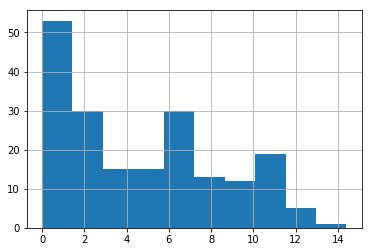

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
drinks.total_litres_of_pure_alcohol.hist();

In [0]:
drinks['drinks_alcohol'] = np.where(drinks['total_litres_of_pure_alcohol']>9, 'high',
                          np.where(drinks['total_litres_of_pure_alcohol']>= 6, 'medium',
                                   np.where(drinks['total_litres_of_pure_alcohol']==0,'none','low')))
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_alcohol
0,Afghanistan,0,0,0,0.0,none
1,Albania,89,132,54,4.9,low
2,Algeria,25,0,14,0.7,low
3,Andorra,245,138,312,12.4,high
4,Angola,217,57,45,5.9,low


In [0]:
countries = pd.read_csv('https://raw.githubusercontent.com/lukes/ISO-3166-Countries-with-Regional-Codes/master/all/all.csv')
print(countries.shape)
countries.head()

(249, 11)


,name,alpha-2,alpha-3,country-code,iso_3166-2,region,sub-region,intermediate-region,region-code,sub-region-code,intermediate-region-code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,NaN,142.0,34.0,NaN
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,NaN,150.0,154.0,NaN
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,NaN,150.0,39.0,NaN
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,NaN,2.0,15.0,NaN
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,NaN,9.0,61.0,NaN


In [0]:
df = drinks.join(countries[['name','region','sub-region']], how='left')
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_alcohol,name,region,sub-region
0,Afghanistan,0,0,0,0.0,none,Afghanistan,Asia,Southern Asia
1,Albania,89,132,54,4.9,low,Åland Islands,Europe,Northern Europe
2,Algeria,25,0,14,0.7,low,Albania,Europe,Southern Europe
3,Andorra,245,138,312,12.4,high,Algeria,Africa,Northern Africa
4,Angola,217,57,45,5.9,low,American Samoa,Oceania,Polynesia


In [0]:
df = pd.merge(drinks, countries[['name','region','sub-region']], how = 'left', left_on = 'country', right_on='name')
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_alcohol,name,region,sub-region
0,Afghanistan,0,0,0,0.0,none,Afghanistan,Asia,Southern Asia
1,Albania,89,132,54,4.9,low,Albania,Europe,Southern Europe
2,Algeria,25,0,14,0.7,low,Algeria,Africa,Northern Africa
3,Andorra,245,138,312,12.4,high,Andorra,Europe,Southern Europe
4,Angola,217,57,45,5.9,low,Angola,Africa,Sub-Saharan Africa


In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193 entries, 0 to 192
Data columns (total 9 columns):
country                         193 non-null object
beer_servings                   193 non-null int64
spirit_servings                 193 non-null int64
wine_servings                   193 non-null int64
total_litres_of_pure_alcohol    193 non-null float64
drinks_alcohol                  193 non-null object
name                            167 non-null object
region                          167 non-null object
sub-region                      167 non-null object
dtypes: float64(1), int64(3), object(5)
memory usage: 15.1+ KB


In [0]:
df.isna().sum()

country                          0
beer_servings                    0
spirit_servings                  0
wine_servings                    0
total_litres_of_pure_alcohol     0
drinks_alcohol                   0
name                            26
region                          26
sub-region                      26
dtype: int64

In [0]:
df[df.region.isna()]

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,drinks_alcohol,name,region,sub-region
5,Antigua & Barbuda,102,128,45,4.9,low,NaN,NaN,NaN
20,Bolivia,167,41,8,3.8,low,NaN,NaN,NaN
21,Bosnia-Herzegovina,76,173,8,4.6,low,NaN,NaN,NaN
24,Brunei,31,2,1,0.6,low,NaN,NaN,NaN
28,Cote d'Ivoire,37,1,7,4.0,low,NaN,NaN,NaN
45,Czech Republic,361,170,134,11.8,high,NaN,NaN,NaN
46,North Korea,0,0,0,0.0,none,NaN,NaN,NaN
47,DR Congo,32,3,1,2.3,low,NaN,NaN,NaN
79,Iran,0,0,0,0.0,none,NaN,NaN,NaN
92,Laos,62,0,123,6.2,medium,NaN,NaN,NaN


In [0]:
drinks.iloc[184]

country                         United States of America
beer_servings                                        249
spirit_servings                                      158
wine_servings                                         84
total_litres_of_pure_alcohol                         8.7
drinks_alcohol                                    medium
Name: 184, dtype: object

In [0]:
# overwrite USA to United states of america

drinks.at[184,'country'] = "United States of America"

In [0]:
df.region.value_counts()

Africa      48
Asia        40
Europe      37
Americas    27
Oceania     15
Name: region, dtype: int64

In [0]:
df['sub-region'].value_counts()

Sub-Saharan Africa                 42
Latin America and the Caribbean    26
Western Asia                       16
Southern Europe                    12
Northern Europe                     9
Southern Asia                       8
Eastern Europe                      8
South-eastern Asia                  8
Western Europe                      8
Northern Africa                     6
Polynesia                           5
Central Asia                        5
Micronesia                          4
Melanesia                           4
Eastern Asia                        3
Australia and New Zealand           2
Northern America                    1
Name: sub-region, dtype: int64

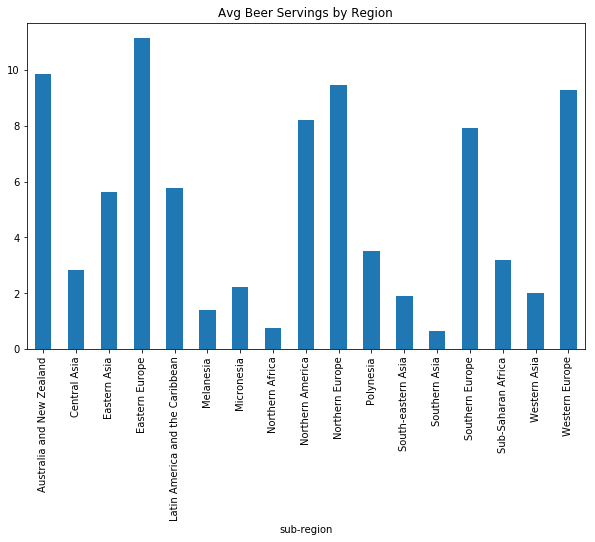

In [0]:
df.groupby('sub-region').total_litres_of_pure_alcohol.mean().plot(kind='bar', figsize = (10,6))
plt.title('Avg Beer Servings by Region')
plt.show()

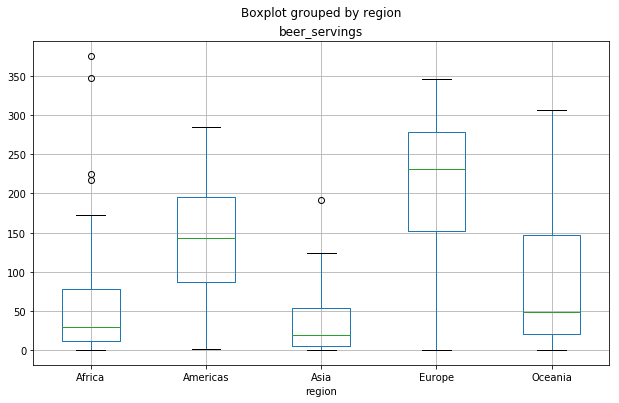

In [0]:
df.boxplot(column = 'beer_servings', by = 'region', figsize= (10,6))
plt.show()

In [0]:
df = df.dropna(subset = ['region'])
df.shape

(167, 9)

In [0]:
from bokeh.io import output_file, show, output_notebook
from bokeh.models import ColumnDataSource, HoverTool, CategoricalColorMapper
from bokeh.palettes import d3
from bokeh.plotting import figure
from bokeh.transform import transform
output_notebook()
x = df.beer_servings.values
y = df.wine_servings.values
country = df.country
region = df.region
source = ColumnDataSource(data=dict(x=x, y=y, country=country, region=region))
hover = HoverTool(tooltips=[
    ("index", "$index"),
    ("(x,y)", "(@x, @y)"),
    ('country', '@country'),
])
palette = d3['Category10'][len(df['region'].unique())]
mapper = CategoricalColorMapper(factors = df['region'].unique(), palette = palette)
# create figure and plot
p = figure(plot_width=600, plot_height=600, 
           tools=[hover, "wheel_zoom", "box_zoom", "reset"], 
           title="Beer and Wine Servings per Year by Country")
# create plot
p.scatter(x='x', y='y', size=10, alpha=0.8,
          color={'field': 'region', 'transform': mapper},
          legend='region', 
          source=source)
# add axis labels
p.xaxis.axis_label = "Beer Servings"
p.yaxis.axis_label = "Wine Servings"
output_file('interactive_bokeh_plot.html')
show(p)

Loading BokehJS ...

## Assignment - now it's your turn

Pick at least one Python DS library, and using documentation/examples reproduce in this notebook something cool. It's OK if you don't fully understand it or get it 100% working, but do put in effort and look things up.

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00244/fertility_Diagnosis.txt', header = None, names = ['season','age','childhood disease','accidents and trauma','surgery','fevers in the year','freq alcohol', 'smoker', 'hrs sitting','diagnosis'] )
print(df.shape)
df.head()

(100, 10)


,season,age,childhood disease,accidents and trauma,surgery,fevers in the year,freq alcohol,smoker,hrs sitting,diagnosis
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O


In [0]:
df['age'] = round((df['age']*18 +18),0) #change decimal age to actual age in years (18-36 yr olds)
df['season'] = np.where(df['season'] == -1, 'winter',
                       np.where(df['season']== -0.33, 'spring',
                               np.where(df['season']== 0.33,'summer','fall'))) #cleaning up data
df['diagnosis'] = df['diagnosis'].replace(to_replace = 'N', value = 1)
df['diagnosis'] = df['diagnosis'].replace(to_replace = 'O', value = 0)
df.head()

,season,age,childhood disease,accidents and trauma,surgery,fevers in the year,freq alcohol,smoker,hrs sitting,diagnosis
0,spring,30.0,0,1,1,0,0.8,0,0.88,1
1,spring,35.0,1,0,1,0,0.8,1,0.31,0
2,spring,27.0,1,0,0,0,1.0,-1,0.50,1
3,spring,32.0,0,1,1,0,1.0,-1,0.38,1
4,spring,30.0,1,1,0,0,0.8,-1,0.50,0


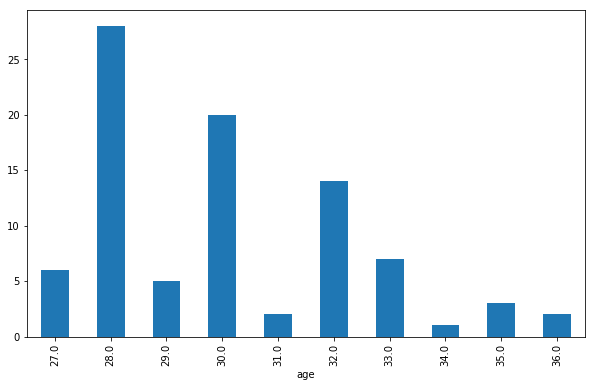

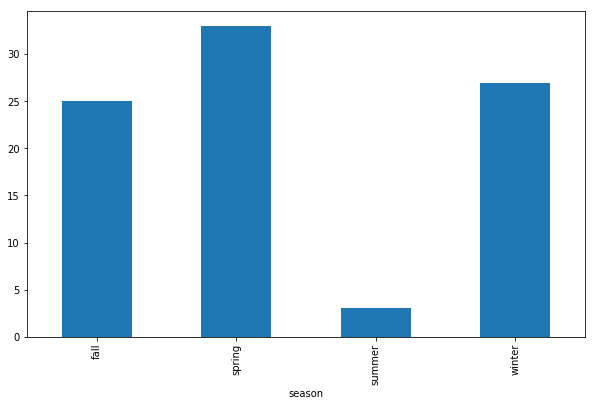

In [0]:
df.groupby('age').diagnosis.sum().plot(kind='bar', figsize = (10,6))
plt.show()
df.groupby('season').diagnosis.sum().plot(kind='bar', figsize = (10,6))
plt.show()

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  Describe in a paragraph of text what you did and why, as if you were writing an email to somebody interested but nontechnical.

I was able to get my data from UCI Machine Learning Repository about male fertility rates. The dataframe had to be changed in such a way to make it easier to analyze. There were many interesting attributes to look at, but, I ended up deciding on comparing age to fertilty rates and comparing the season and fertility rates. 

2.  What was the most challenging part of what you did?

Finding a useable .csv. I ended up using a .txt file and cleaning up the dataframe for my use. 

3.  What was the most interesting thing you learned?

how to sort through data and figuring out how to set your data up in such a way that its easy to work with. 

4.  What area would you like to explore with more time?

alternate methods to loading data sets into pandas




## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub (and since this is the first assignment of the sprint, open a PR as well).

- [pandas documentation](https://pandas.pydata.org/pandas-docs/stable/)
- [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
- [matplotlib documentation](https://matplotlib.org/contents.html)
- [Awesome Data Science](https://github.com/bulutyazilim/awesome-datascience) - a list of many types of DS resources

Stretch goals:

- Find and read blogs, walkthroughs, and other examples of people working through cool things with data science - and share with your classmates!
- Write a blog post (Medium is a popular place to publish) introducing yourself as somebody learning data science, and talking about what you've learned already and what you're excited to learn more about.